# Data Structures Course 
Shiraz University Fall 2024    
Reza Rezazadegan   
[www.dreamintelligent.com](www.dreamintelligent.com) 

# 6- AVL Trees

We saw in the last chapter that tree operations such as search, insertion and deletion are done in $O(h)$ where $h$ is the height of the tree. We also saw that there are different binary search trees implementing the same set of elements. 
Ideally we want our tree to have minimum height i.e. $h\in O(\log n)$. Such a tree is called _balaned_. To keep a tree balanced, there are different methods. Here we study one of the oldest and simplest methods named **AVL** after Adelson-Velskii and Landis. An AVL tree is height-balanced. 

A binary tree is _height balanced_ if each of its nodes are height balanced, meaning that the heights of its right and left subtree differ by at most 1. 

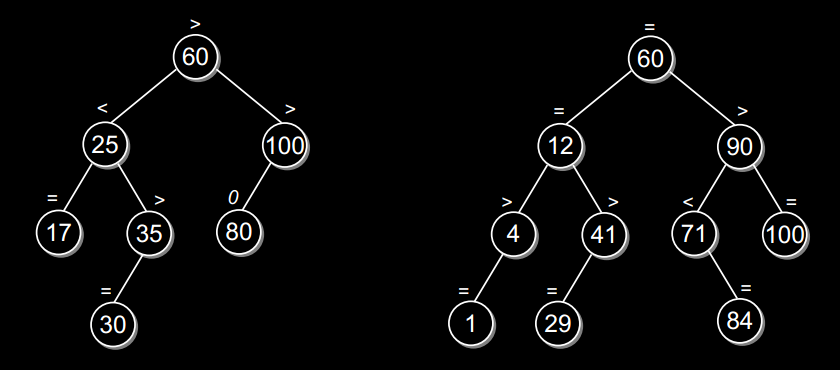


**Proposition:** every heigh-balanced tree is balances.   

**Exercise 1:** prove this proposition. (Hint: use induction on $h$.)

To each node of an AVL tree we associate a _balance factor_ or _skew_ which is the height of its right subtree minus the height of its left subtree.   
A node is height-balanced if and only if its skew is -1, 0 or 1.   
We denote skew towards left, right and lack of skew  by $>, <, =$ in tree diagrams. 

If a tree is balanced and we insert or delete a node (a key) then the tree may become unbalanced.    
Recall from last chapter that insertion and deletion was done on leaves of the tree. 

Since the heights change only by +1 or -1, the magnitude of the new skews are less than or equal 2. And only the skew of the ancestors of the inserted or deleted leaf are affected. 

**Method for rebalancing the tree after an insertion or deletion:** rebalance the ancestors of the leaf, from the leaf itself up to the root. 


An example of an insertion which makes a tree unbalanced, and how it is balanced back. 
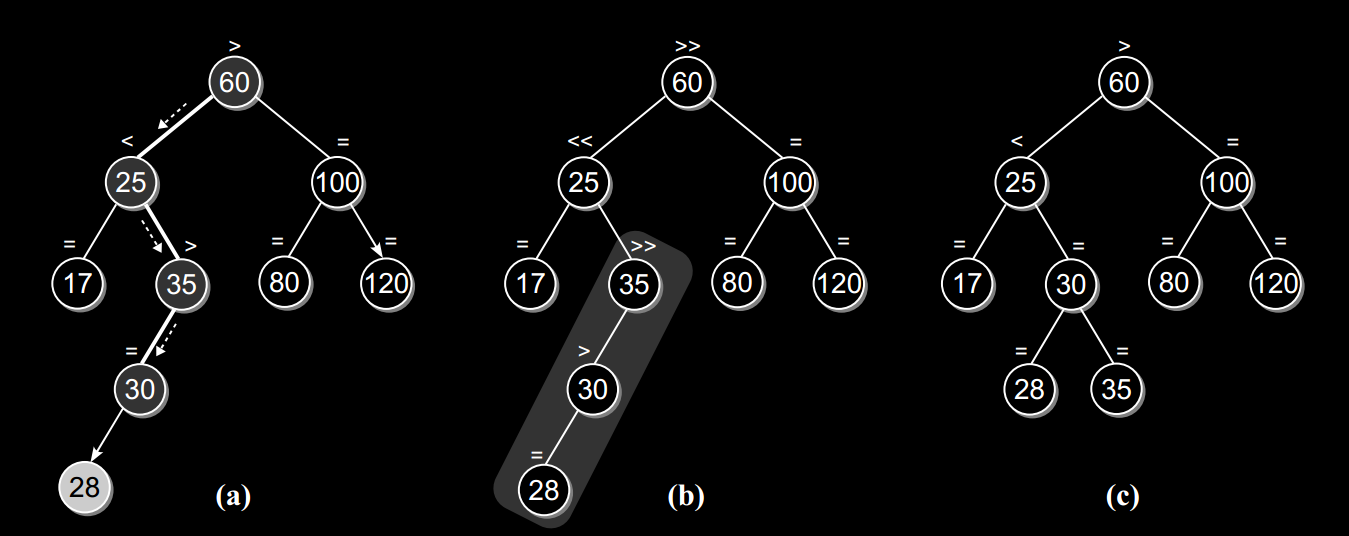

Rebalancing is done using **rotations:**

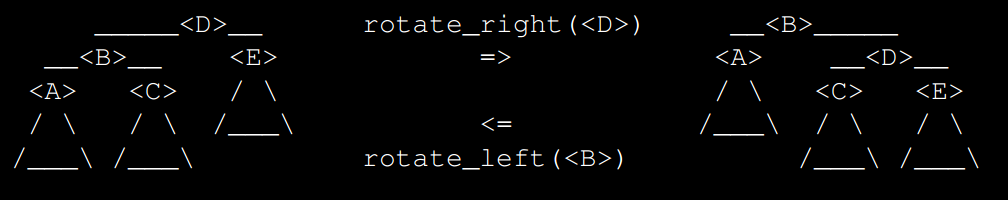

Rotations are done in $O(1)$ and preserve the traversal order of the tree. 


After inserting a node that makes the tree unbalanced, we find the lowest level node whose subtree is unbalanced. We call this node _pivot node_.


Imagine B is a node in a binary tree whose skew is 2. (The case of skew=-2 is similar.)  Assume every other node in the subtree of B is height-balanced. (If another node in the subtree of B is unbalanced, we can replace B with it.)

**Proposition:** the subtree of B can become height-balanced with 1 or 2 rotations. 

**Proof: ** B must have a right child F. The skew of F is: 
- 0: Case 1  
- 1: Case 2
- -1: Case 3

**Cases 1,2:** perform a left rotation on B.
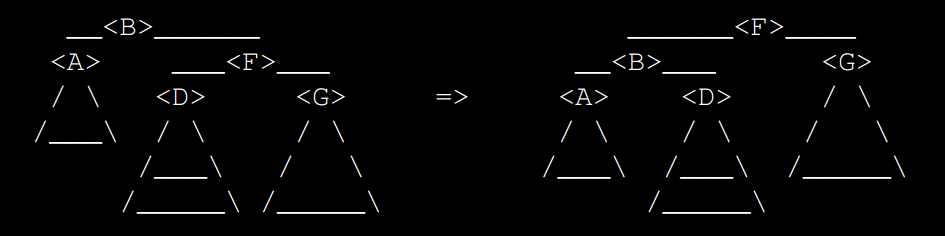


**Exercise 2:** Show that the nodes in the subtree of B are now height-balanced. 

**Exercise 3:** prove that the traversal order is the same before and after the above rotation. 

**Case 3:** F must have a left child D. We perform a right rotation on F then a left rotation on B. 

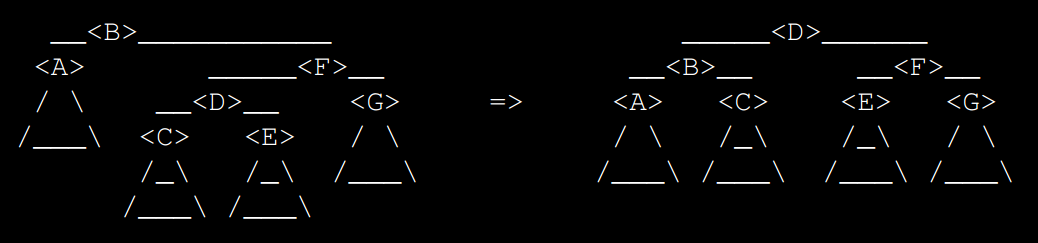

**Exercise 4:** Show that the nodes in the subtree of B are now height-balanced. 

**Exercise 5:** prove that the traversal order is the same before and after the above rotation. 


**Proposition 3:** if T is a height-balanced tree and T' is obtained from it by inserting or deleting a node then T' can be rebalanced by $O(\log n)$ rotations. 

**Proof:** only the ancestor of the inserted or deleted leaf are affected, and there is at most $O(\log n)$ of them. 

**Note:** we have to check whether up to $O(\log n)$ nodes are height balanced!


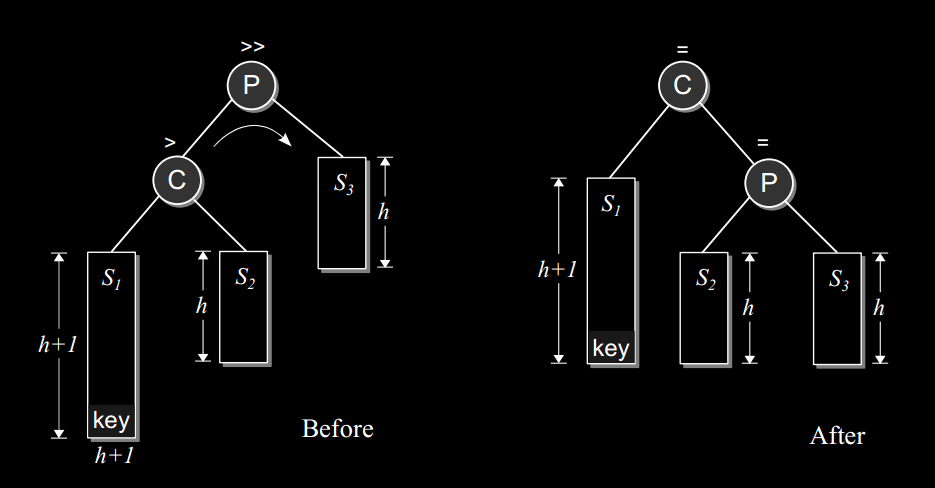



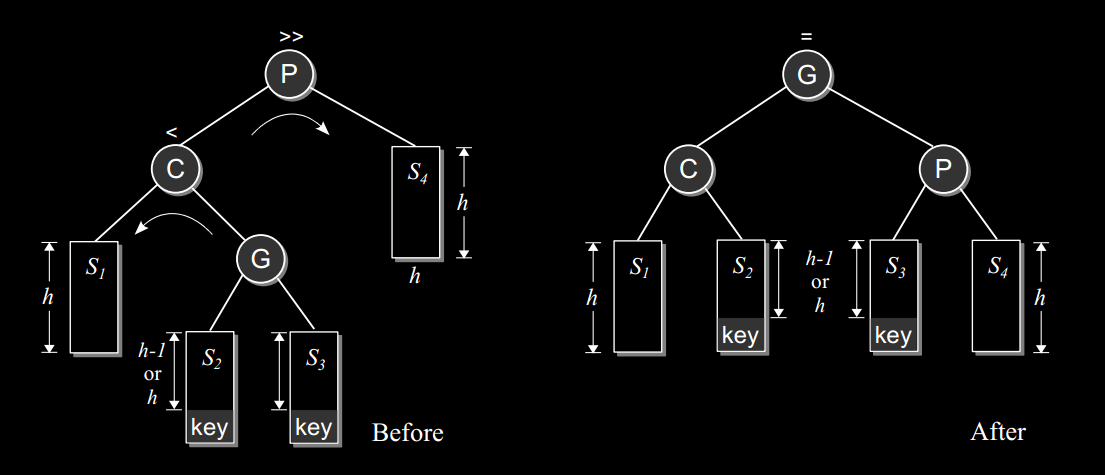


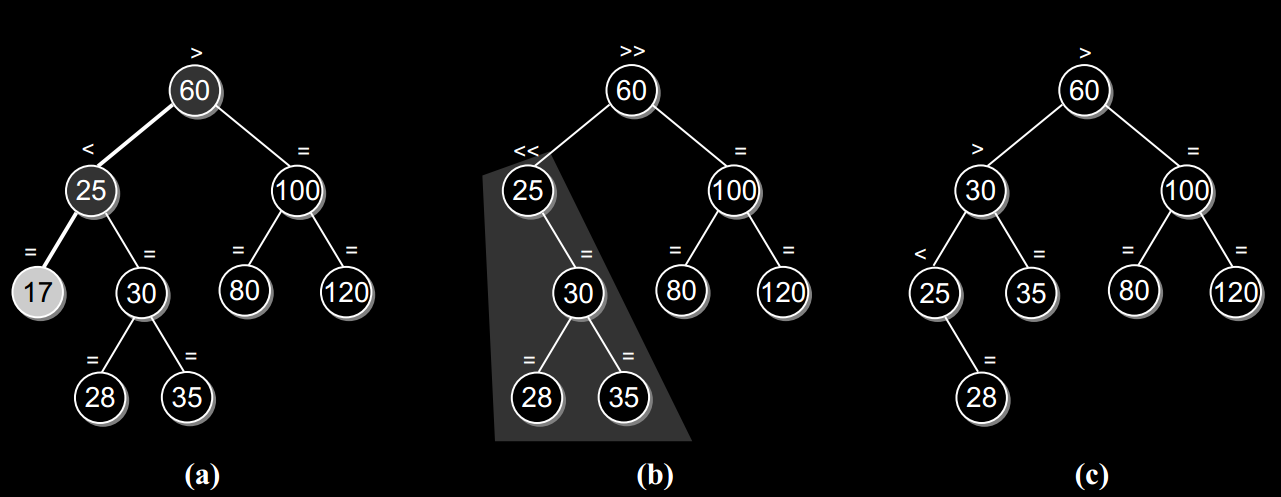



## Computing node heights

Rebalancing requires us to check at least Ω(log n) heights in the worst-case, so if we want rebalancing the tree to take at most O(log n) time, we need to be able to evaluate the height of a node in O(1) time. 

Instead of computing the height of a node every time we need it, we will speed up computation via augmentation: in particular each node stores and maintains the value of its own subtree height.

When the structure of the tree changes, we will need to update and recompute the height at nodes whose height has changed. 

In [ ]:
def height(A):
    if A: return A.height
    else: return -1

class Binary_Node:
    def __init__(A, x): # O(1)
        A.item = x
        A.left = None
        A.right = None
        A.parent = None
        A.subtree_update()

    def subtree_update(A): # O(1)
        A.height = 1 + max(height(A.left), height(A.right))

    def skew(A): # O(1)
        return height(A.right) - height(A.left)

    def subtree_iter(A): # O(n)
        if A.left: yield from A.left.subtree_iter()
        yield A
        if A.right: yield from A.right.subtree_iter()
        
    def subtree_first(A): # O(log n)
        if A.left: return A.left.subtree_first()
        else: return A
    
    def subtree_last(A): # O(log n)
        if A.right: return A.right.subtree_last()
        else: return A
    
    def successor(A): # O(log n)
        if A.right: return A.right.subtree_first()
        while A.parent and (A is A.parent.right):
            A = A.parent
        return A.parent
    
    def predecessor(A): # O(log n)
        if A.left: return A.left.subtree_last()
        while A.parent and (A is A.parent.left):
            A = A.parent
        return A.parent
    
    def subtree_insert_before(A, B): # O(log n)
        if A.left:
            A = A.left.subtree_last()
            A.right, B.parent = B, A
        else:
            A.left, B.parent = B, A
            A.maintain()
    def subtree_insert_after(A, B): # O(log n)
        if A.right:
            A = A.right.subtree_first()
            A.left, B.parent = B, A
        else:
            A.right, B.parent = B, A
            A.maintain()
    def subtree_delete(A): # O(log n)
        if A.left or A.right:
            if A.left: B = A.predecessor()
            else: B = A.successor()
            A.item, B.item = B.item, A.item
            return B.subtree_delete()
        if A.parent:
            if A.parent.left is A: A.parent.left = None
            else: A.parent.right = None
            A.parent.maintain()
        return A

    def subtree_rotate_right(D): # O(1)
        assert D.left
        B, E = D.left, D.right
        A, C = B.left, B.right
        D, B = B, D
        D.item, B.item = B.item, D.item
        B.left, B.right = A, D
        D.left, D.right = C, E
        if A: A.parent = B
        if E: E.parent = D
        B.subtree_update()
        D.subtree_update()

    def subtree_rotate_left(B): # O(1)
        assert B.right
        A, D = B.left, B.right
        C, E = D.left, D.right
        B, D = D, B
        B.item, D.item = D.item, B.item
        D.left, D.right = B, E
        B.left, B.right = A, C
        if A: A.parent = B
        if E: E.parent = D
        B.subtree_update()
        D.subtree_update()

    def rebalance(A): # O(1)
        if A.skew() == 2:
            if A.right.skew() < 0:
                A.right.subtree_rotate_right()
            A.subtree_rotate_left()
        elif A.skew() == -2:
            if A.left.skew() > 0:
                A.left.subtree_rotate_left()
            A.subtree_rotate_right()
            
    def maintain(A): # O(log n)
        A.rebalance()
        A.subtree_update()
        if A.parent: A.parent.maintain()

# Exercises:
6- Consider the following set of values and use them to build the indicated type of tree by adding one value at a time in the order listed:   
30 63 2 89 16 24 19 52 27 9 4 45   
(a) binary search tree (b) AVL tree 

7- Repeat Exercise 6, but for the following set of keys:   
T I P A F W Q X E N S B Z

8- Given the following binary trees, indicate which trees are height balanced.
 
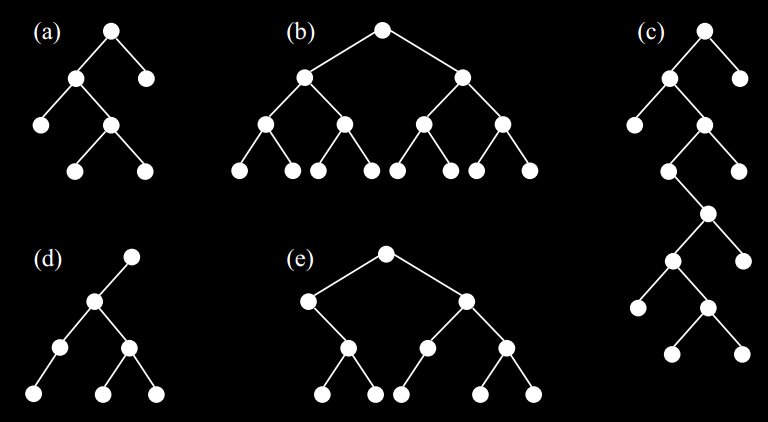


9- Consider the binary search tree below and show the resulting tree after deleting each one of the following keys: 14, 52, and 39.

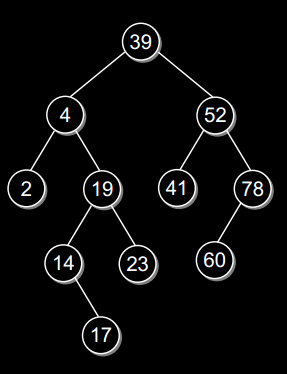

10- Consider AVL tree below and show the resulting tree after deleting key values 1, 78, and 41.

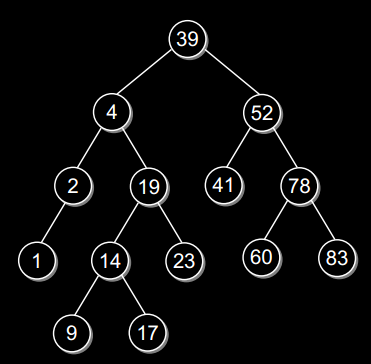

11- Prove that if T, T' are two binary trees with the same number $n$ of nodes and the same traversal order then T can be converted to T' by a series of at most $n$ rotations. (Hint: show that T or T' can be converted to a linear tree i.e. a tree in which every node has at most 1 child, with a series of rotations.)

